In [ ]:
# This code will find the pitch and formant of filler word from audio for a given start and end time
#Inputs: audio files with .wav formate
#Output: pitch, formant
#Files this notebook refers: Docs inside '/content/drive/My Drive/Paleru_Khushi/Filler_words_audios/Person_um1.wav'
#Author: Khushi Pitroda
#Date: 9-July-2021

In [ ]:
#Prerequisite
#.Wav (audio) files with high and low volumes
#parselmouth
#timestamp - start and end point of filler word - I've refered 'https://colab.research.google.com/drive/1-MgFNKuhpHn7kyelb-i9_R5A4Hb3dQLr#scrollTo=aqIXw_MQmhrZ' for that timestamp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Change directory 
#Go to shared with me folder create shortcut of shared folder and add it to the my drive so you can access that shared folder from here.

import os 
os.chdir("/content/drive/MyDrive/Paleru_Khushi")    


In [ ]:
pip install praat-parselmouth

     |████████████████████████████████| 10.7 MB 4.4 MB/s 


In [ ]:
import parselmouth
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

With zero - average pitch: 46.53247766342475 Hz
Without zero - average pitch: 129.41845350140008 Hz
[285.83174117248524, 283.79657700535233, 375.6001101664721, 534.129461792985, 618.3500683181569, 649.282774875461, 688.2226275905742, 731.9275026986733, 757.6449902585151, 774.0534178188518, 772.972364362894, 773.6497076303364, 769.4548939800962, 764.7754623218887, 767.8436963648747, 767.547256616571, 761.7307639991354, 754.9516967685535, 757.1013298285887, 739.4599515909181, 723.9862102502923, 722.220409736307, 707.2428744492217, 693.788814111588, 675.7055104546168, 636.5897061831859, 602.371590169861, 541.4710923856461, 415.1434657661299, 320.84643363831674, 298.4466620815509, 328.57436178439525, 370.3191564143012, 341.4840500994107, 879.8727346755394, 1042.419694022537, 698.7163733731281, 745.6338795080399, 858.5642932112653, 1360.1397547591305, 1693.4444935569281, 1307.800407656259, 980.5612284822289, 1343.9049493166303, 1752.396207746526, 1257.0529141858883, 786.7570422713989, 1281.

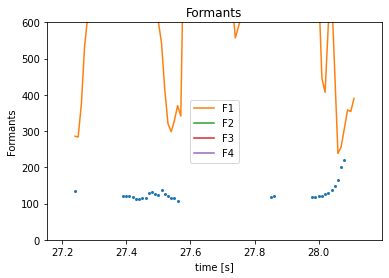

F1: 703.413799115602 Hz
F2: 1633.8432244742194 Hz
F3: 2895.75600751683 Hz
F4: 3562.122850019659 Hz


In [ ]:
snd = parselmouth.Sound('/content/drive/My Drive/Paleru_Khushi/Filler_words_audios/Person_um1.wav')  #loading the file
from_time=27.22
to_time=28.14
snd_part = snd.extract_part(from_time,to_time, preserve_times=True)                          #extract part of audio where filler word occures

pitch = snd_part.to_pitch()                 #finding pitch of that filler word

def draw_pitch(pitch):                      #draw graph of found pitch
  # Extract selected pitch contour, and
  # replace unvoiced samples by NaN to not plot
  pitch_values = pitch.selected_array['frequency']
  print("With zero - average pitch: " + str(sum(pitch_values)/len(pitch_values))+" Hz")       #value pitch including zero
  pitch_values[pitch_values==0] = np.nan
  plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
  plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
  plt.grid(False)
  plt.margins(x=0.1)
  plt.xlabel("time [s]")
  plt.ylim(0, pitch.ceiling)
  plt.ylabel("fundamental frequency [Hz]")

draw_pitch(pitch)

pitch_values = pitch.selected_array['frequency']

y=0   #variable sum of pitch_values which are non-zero
x=0   #for track of total non-zero pitch values
for i in pitch_values:
    if(i!=0):
      x = x + 1       
      y = y + i


print("Without zero - average pitch: " + str(y/x) + " Hz")

hop_dur = .01   #predefined value for time step
num_form = 4    #predefined value for max number of formants = the number of peaks with which the entire spectrum is modelled
max_form_freq = 4500    #predefined value for maximum formant

form = snd_part.to_formant_burg(time_step=hop_dur, max_number_of_formants=num_form, maximum_formant = max_form_freq, pre_emphasis_from=50.0)


times = pitch.ts()


form_1_vals = []  #list for storing audio's f1
form_2_vals = []  #list for storing audio's f2
form_3_vals = []  #list for storing audio's f3
form_4_vals = []  #list for storing audio's f4


for dt in times:      #for loop used with average of time instants
    form_1_vals.append(form.get_value_at_time(1,dt))    #storing the values of F1 audio in list
    form_2_vals.append(form.get_value_at_time(2,dt))    #storing the values of F2 audio in list
    form_3_vals.append(form.get_value_at_time(3,dt))    #storing the values of F3 audio in list
    form_4_vals.append(form.get_value_at_time(4,dt))    #storing the values of F4 audio in list
print(form_1_vals)
print(form_2_vals)
print(times)
#for graph of formants
form_vals = [form_1_vals,form_2_vals,form_3_vals,form_4_vals]

plt.title('Formants')
plt.plot(times,form_1_vals,label = "F1")
plt.plot(times,form_2_vals,label = "F2")
plt.plot(times,form_3_vals,label = "F3")
plt.plot(times,form_4_vals,label = "F4")
plt.xlabel("time [s]")

plt.ylabel("Formants")
plt.legend()
plt.show()

'''
x=1
for i in form_vals:
  print("\n--------------------------F"+str(x)+"--------------------------")
  plt.plot(times,i)
  plt.ylabel("F"+str(x))
  plt.xlabel("time [s]")
  plt.show()
  x=x+1'''

#for printing average formant values
cleanedList1 = [x for x in form_1_vals if str(x) != 'nan']     #discarding null values from the list for audio's f1 list
print("F1: "+str(sum(cleanedList1)/len(cleanedList1))+ " Hz")     #printing the average of value of F1 from given list for audio

cleanedList2 = [x for x in form_2_vals if str(x) != 'nan']      #discarding null values from the list for audio's f2 list
print("F2: "+str(sum(cleanedList2)/len(cleanedList2))+ " Hz")   #printing the average of value of F2 from given list for audio

cleanedList3 = [x for x in form_3_vals if str(x) != 'nan']      #discarding null values from the list for audio's f3 list
print("F3: "+str(sum(cleanedList3)/len(cleanedList3))+ " Hz")   #printing the average of value of F3 from given list for audio

cleanedList4 = [x for x in form_4_vals if str(x) != 'nan']      #discarding null values from the list for audioe's f4 list
print("F4: "+str(sum(cleanedList4)/len(cleanedList4))+ " Hz")   #printing the average of value of F4 from given list for audio
